In [1]:
import pandas as pd
import MySQLdb as mdb

In [9]:
message = {
        'host': '127.0.0.1',
        'user': 'root',
        'passwd': ' ',
        'db': '163music',
        'charset': 'utf8mb4'  # 指定编码格式!!!
    }
connection = mdb.connect(**message)
sql = "SELECT * FROM api_userdetail"
with connection.cursor() as cursor:
        cursor.execute(sql)
        data = cursor.fetchall()
        res = [{i: data[i] } for i in range(len(data))]

In [12]:
message = {
        'host': '127.0.0.1',
        'user': 'root',
        'passwd': ' ',
        'db': '163music',
        'charset': 'utf8mb4'  # 指定编码格式!!!
    }
connection = mdb.connect(**message)
sql = "SELECT loc_province FROM api_userdetail"
with connection.cursor() as cursor:
        cursor.execute(sql)
        res = [i[0] for i in cursor.fetchall()]
connection.close()

In [15]:
data = pd.DataFrame()
data['province'] = res
data.head()

,province
0,北京市
1,辽宁省
2,北京市
3,广东省
4,四川省


In [26]:
data.groupby(by='province').size().sort_values(ascending=False)

province
广东省     3519
海外      2431
江苏省     1959
四川省     1573
浙江省     1458
北京市     1429
湖北省     1355
上海市     1136
山东省     1131
福建省      911
湖南省      902
安徽省      892
河南省      892
陕西省      734
重庆市      730
江西省      680
辽宁省      672
广西       596
河北省      490
黑龙江省     459
云南省      452
新疆       424
天津市      420
山西省      370
吉林省      352
贵州省      299
内蒙古      250
甘肃省      202
海南省      157
香港        98
台湾省       86
宁夏        67
青海省       55
西藏        41
澳门        27
dtype: int64

In [27]:
data = data[data.province != '海外']
data.shape

(29069, 1)

In [31]:
province = data.groupby(by='Province').size().sort_values(ascending=False)

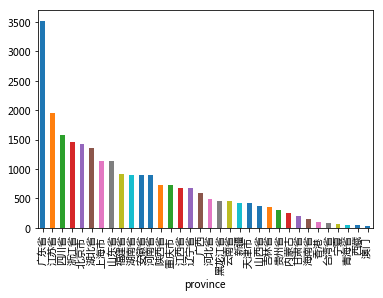

In [32]:
province.plot(kind='bar')

In [35]:
message = {
        'host': '127.0.0.1',
        'user': 'root',
        'passwd': ' ',
        'db': '163music',
        'charset': 'utf8mb4'  # 指定编码格式!!!
    }
connection = mdb.connect(**message)
sql = "SELECT age FROM api_userdetail"
with connection.cursor() as cursor:
        cursor.execute(sql)
        res = [i[0] for i in cursor.fetchall() if i[0]!=None]
connection.close()

In [123]:
data = pd.DataFrame(res, columns=[['Birth']])
data.head()

,Birth
0,1997-06-30 16:00:00
1,1997-08-18 17:22:00
2,1992-06-11 16:22:54
3,1997-05-13 16:00:00
4,2015-10-22 16:00:00


In [124]:
def get_year(ff):
    return ff['Birth'][0].year

In [125]:
data['Years'] = data.apply(get_year, axis=1)
data.head()

,Birth,Years
0,1997-06-30 16:00:00,1997
1,1997-08-18 17:22:00,1997
2,1992-06-11 16:22:54,1992
3,1997-05-13 16:00:00,1997
4,2015-10-22 16:00:00,2015


In [126]:
data.head()

,Birth,Years
0,1997-06-30 16:00:00,1997
1,1997-08-18 17:22:00,1997
2,1992-06-11 16:22:54,1992
3,1997-05-13 16:00:00,1997
4,2015-10-22 16:00:00,2015


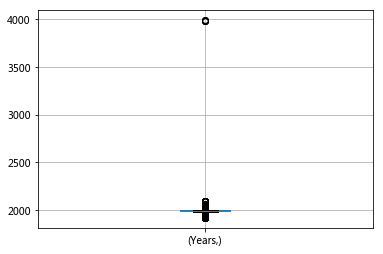

In [127]:
data.boxplot()

In [134]:
data1 = data[data['Years'] < 2018]['Years']

In [135]:
data1.head()

,Years
0,1997.0
1,1997.0
2,1992.0
3,1997.0
4,2015.0


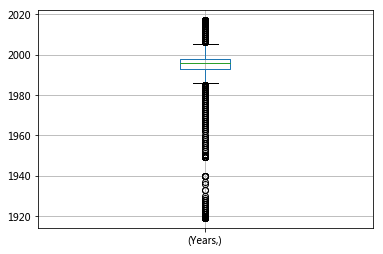

In [137]:
data1.boxplot()

In [138]:
def get_age(ff):
    return 2018 - ff['Years'][0]

In [139]:
data1['Age'] = data1.apply(get_age, axis=1)
data.describe()

,Years
count,18923.000000
mean,1995.182212
std,34.598431
min,1919.000000
25%,1993.000000
50%,1996.000000
75%,1998.000000
max,3988.000000


In [140]:
data1.head()

,Years,Age
0,1997.0,21.0
1,1997.0,21.0
2,1992.0,26.0
3,1997.0,21.0
4,2015.0,3.0


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data1.to_csv('aaa.csv')

In [149]:
ff = pd.read_csv('aaa.csv')
ff.head()

,Unnamed: 0,Years,Age
0,0,1997.0,21.0
1,1,1997.0,21.0
2,2,1992.0,26.0
3,3,1997.0,21.0
4,4,2015.0,3.0


,Unnamed: 0,Years,Age
18918,18918,2002.0,16.0
18919,18919,1997.0,21.0
18920,18920,1989.0,29.0
18921,18921,1996.0,22.0
18922,18922,1995.0,23.0


In [159]:
ff.describe()

,Unnamed: 0,Years,Age
count,18923.000000,18801.000000,18801.000000
mean,9461.000000,1994.300888,23.699112
std,5462.743908,11.087656,11.087656
min,0.000000,1919.000000,1.000000
25%,4730.500000,1993.000000,20.000000
50%,9461.000000,1996.000000,22.000000
75%,14191.500000,1998.000000,25.000000
max,18922.000000,2017.000000,99.000000


(0, 100)

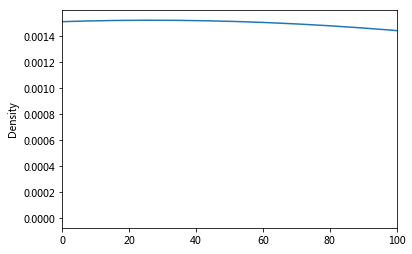

In [153]:
ff.groupby(by='Age').size().plot(kind='kde')
plt.xlim((0,100))

(0, 100)

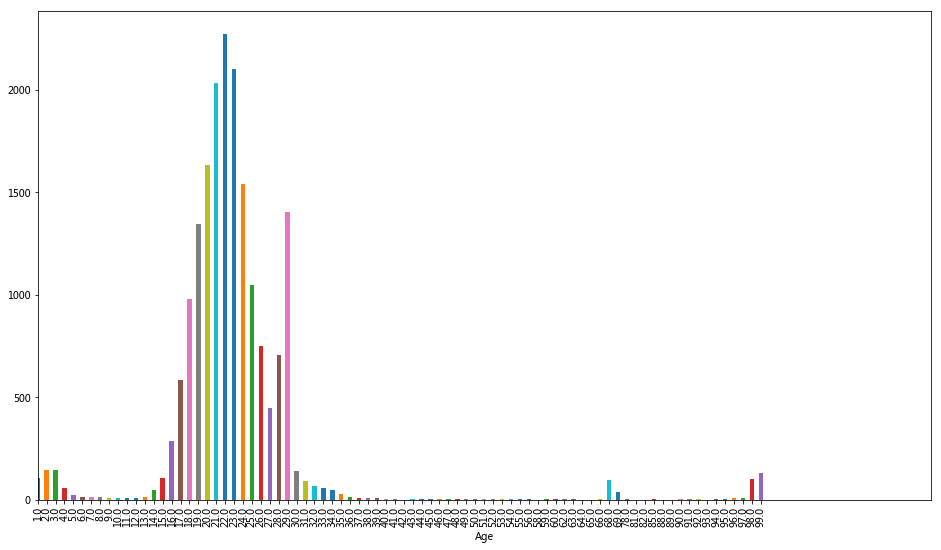

In [156]:
plt.figure(figsize=(16,9))
ff.groupby(by='Age').size().plot(kind='bar')
plt.xlim((0,100))

(0, 100)

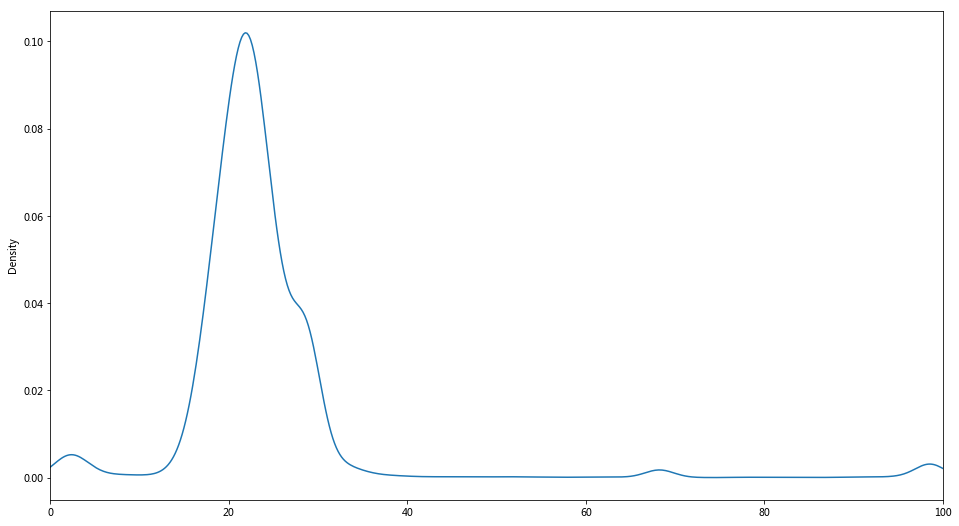

In [163]:
plt.figure(figsize=(16,9))
ff.Age.plot(kind='kde')
plt.xlim(0,100)